In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import emoji
import regex

import pandas as pd
import numpy as np
import collections, functools, operator
from collections import Counter
import matplotlib.pyplot as plt

In [22]:
df = pd.read_json("C:/Users/zhuang/Documents/GitHub/twitter-hook-graphics/data/lebron_james_tweets.json")

In [6]:
def analyze_sentiment(text):
    vader_sent_dicts = []

    analyzer = SentimentIntensityAnalyzer()
    for sentence in list(text):
        vs = analyzer.polarity_scores(sentence)
        vader_sent_dicts.append(vs)
    
    sent_class = []

    for i in vader_sent_dicts:
        if i["compound"] >= 0.05:
            sent_class.append("positive")
        elif i["compound"] <= -0.05:
            sent_class.append("negative")
        else:
            sent_class.append("neutral")
            
    return Counter(sent_class)

In [17]:
def get_nrc_values(text):
    nrc_dicts = []

    for i in list(text):

        text_object = NRCLex(i)
        
        nrc_dicts.append(text_object.raw_emotion_scores)
        
    result = dict(functools.reduce(operator.add,map(collections.Counter, nrc_dicts)))
        
    del result["positive"]
    del result["negative"]
        
    return result

In [179]:
def make_pie_chart(d_sent, d_nrc):
    
    
    labels1 = ['neutral', 'positive', 'negative']
    sizes1 = [d_sent['neutral'], d_sent["positive"], d_sent["negative"]]
    title1 = "Your tweets by emotional category"
        
        

    labels2 = d_nrc.keys()
    sizes2 = [d_nrc[i] for i in labels2]
    title2 = "Words in your tweets by emotional subcategory"
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
    ax1.pie(sizes1, labels=labels1, autopct='%1.0f%%')
    ax1.axis('equal')  
    
    ax2.pie(sizes2, labels=labels2, autopct='%1.0f%%')
    ax2.axis('equal') 
    
    ax1.title.set_text(title1)
    ax2.title.set_text(title2)
    
    plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

    plt.show()
    

In [180]:
def extract_top3_emojis(text):
    emoji_list = []
    for i in list(text):
        e = [c for c in i if c in emoji.UNICODE_EMOJI['en']]
        emoji_list.extend(e)
        
    return [i[0] for i in Counter(emoji_list).most_common(3)]

In [181]:
sent = analyze_sentiment(df.full_text)
nrc = get_nrc_values(df.full_text)
e = extract_top3_emojis(df.full_text)

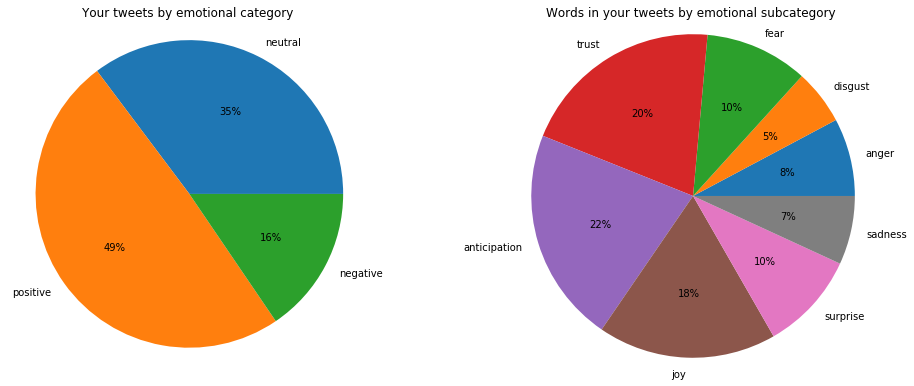

In [183]:
make_pie_chart(sent,nrc)

UnicodeEncodeError: 'latin-1' codec can't encode characters in position 0-2: ordinal not in range(256)

In [195]:
e

['🤣', '🔥', '🏾']